In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.register_optimizer as regop
import src.QAA as qaa
from src import qubo
from src import graphs
import src.GRAPH_LDF as qrac
import src.Annealing as ann
from src import QAOA

# Random graph 0.5 connectivity

[0 1 1 1 1 1 1 1 0]
-7.0


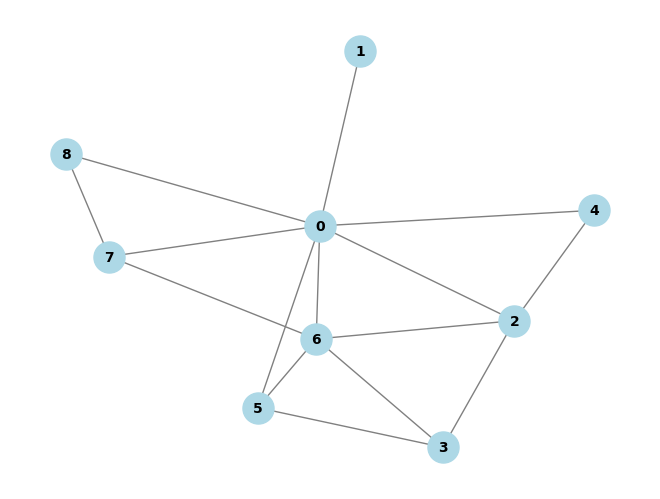

In [2]:
G = graphs.draw_random_graph(9, 0.5)
Q = qubo.QUBO_Q(G)
graph_matrix = qubo.graph_matrix(G)
graphs.plotting_random(G)


sol = qubo.QUBO_solver(Q)
print(sol)
classical_cost = qubo.get_cost_colouring(sol, Q)

reg = regop.optimized_register(Q, 5)
#regop.draw_register(reg)

# QUBO + QAA

In [3]:
costs = []
for T in np.linspace(1000, 10000, 10):
    seq = qaa.adiabatic_sequence(Q, reg, T)
    counts = qaa.get_counts(seq)
    costs.append(1 - qubo.get_cost(counts, Q)/classical_cost)

#qaa.plot_costs(costs)
print("Cost: ", np.min(costs))

Cost:  -0.2201428571428572


# QRAO

In [4]:
N_v = len(graph_matrix)
qrac_mat, n_qbit, qbit_ord, features = qrac.QRAC_HAMILTONIAN(graph_matrix, N_v)
_, gs_vector = ann.Annealing_GS(qrac_mat, n_qbit, M=1, taumax=100.0, t_steps=1000)
gs_vector = gs_vector[0]
result, result_1 =  qrac.Graph_partition_func(gs_vector, N_v, qbit_ord, n_qbit, features)
cost = qubo.get_cost_colouring(result, Q)
print("Cost:", 1 - cost/classical_cost)

Cost: 1.0


# QUBO + QAOA

In [5]:
cost = QAOA.QAOA(Q)
print("Cost:", 1 - cost/classical_cost)